In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

# Ex. 3.1

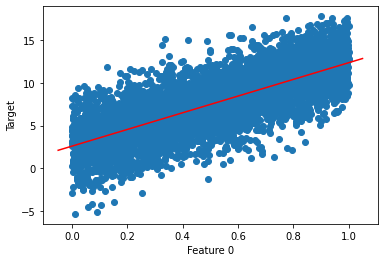

In [5]:
samples = 50 #100, 500, 1000, 2500, 5000
x = np.random.uniform(low=0,high=1,size=(samples,1))
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = 10*x + 5*e
a = pr.gendatr(x,y)
w = pr.ridger(a, 5)# 5,10,15,100
pr.scatterr(a)
pr.plotr(w, color='red')

varying the `samples` and increasing gradually shows that the effect of `ridger`'s lambda value decreases. The line gets steeper as the number of datums increase. This shows that the value of lambda = 5 lowers its effect on the slope of the line and the least squares optimizer finds the most optimal params by itself due to the rich quantity of data 

high vals of lambda also suppress the weights, so much so that after a point, the regressor produces a y = c line. 

# Ex. 3.2 

In [216]:
samples = 1
x = np.random.uniform(low=0,high=1,size=(samples,1))
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = 10*x + 5*e
a = pr.gendatr(x,y)

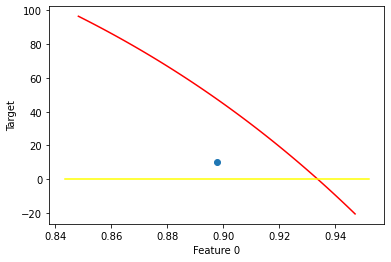

In [225]:
wl = pr.linearr(a, 7)
wr = pr.ridger(a, 10000)
pr.scatterr(a)
pr.plotr(wl, color='red')
pr.plotr(wr, color='yellow')

In [226]:
wr.data

array([[0.00090778],
       [0.00101131]])

Varying the lambda values doesn't change the intercept of ~(-2.1) as shown by the standard linear regression

# Ex. 3.3 

In [24]:
samples = 10000; split = 10
x = np.random.uniform(low=0,high=1,size=(samples,1))
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = x + e
train = pr.gendatr(x[:int(samples*split/100)], y[:int(samples*split/100)])
test = pr.gendatr(x[int(samples*split/100):],y[int(samples*split/100):])

Error on Test Data:  0.5005430855133856


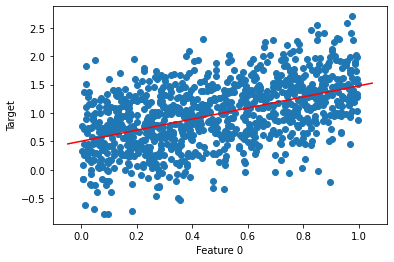

In [25]:
w = pr.ridger(train, 0.111)
e = pr.testr(test, w)
pr.scatterr(train)
pr.plotr(w, color='red')
print('Error on Test Data: ', e)

In [28]:
errors = []
for lam in [0, 0.001, 0.01, 0.1, 0, 1, 2, 3, 10, 1000000000]:
    w = pr.ridger(train, lam)
    eval = w.eval(test)
    e = pr.testr(eval)
    errors.append(e)
errors

[0.24843656668616385,
 0.24843663381697276,
 0.2484372385941317,
 0.24844334558358555,
 0.24843656668616385,
 0.24851017114369864,
 0.2485960209678628,
 0.24869311354079315,
 0.24961961932029858,
 1.336791920323273]

# Ex. 3.7

In [61]:
samples = 20
x = np.random.normal(0.5, 0.5,size=(samples,1))
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = x + 0.2*e
a = pr.gendatr(x,y)

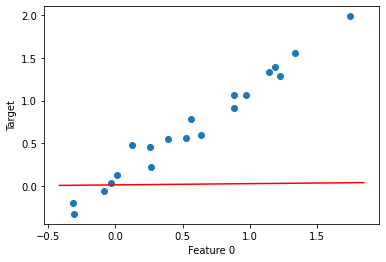

In [80]:
wl = pr.ridger(a, 1000)
pr.scatterr(a)
pr.plotr(wl, color='red')

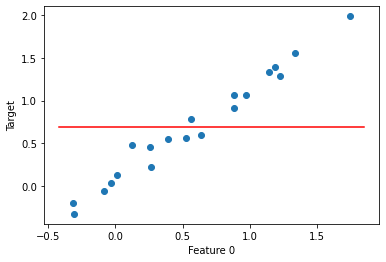

In [85]:
wla = pr.lassor(a, 1)
pr.scatterr(a)
pr.plotr(wla, color='red')

LASSO regression causes the weights(slope, not intercept) to shrink to 0 much quicker than Ridge regression (slope and intercept) w.r.t. the vals of lambda.

# Ex. 3.13 

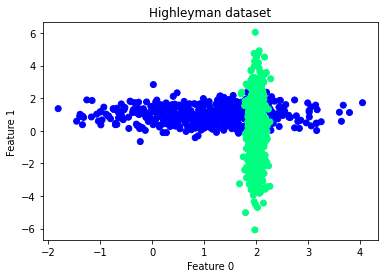

In [146]:
test = pr.gendath([500,500])
pr.scatterd(test)

In [162]:
train = pr.gendath([20,20])
w = pr.ldc(train)
b = w.eval(test)
e = pr.testc(b)
print(e)

0.226


Since the training dataset is much smaller than the test dataset, it only captures a small part of the local variances in the test set to produce good results on it. Now, when the small training dataset keeps changing with each iteration, the results vary drastically as the LDC only learns a part of the data, that too very different each time.  

In [97]:
train = pr.gendath([20, 20])
w = pr.ldc(train)

In [145]:
test = pr.gendath([500,500])
b = w.eval(test)
print(pr.testc(b))

0.164


When the test set is varied each time, the learner still remains the same. Additionally, the test set is much bigger in size than the train set and thus all the errors over every sample averages out to be the same each time.

# Ex.3.14 

In [164]:
a = pr.gendath([1000,1000])
n = np.random.uniform(low=-1,high=1,size=(2000,60))
a1 = np.concatenate((a.data, n), axis=1)
a1 = pr.prdataset(a1, a.targets)

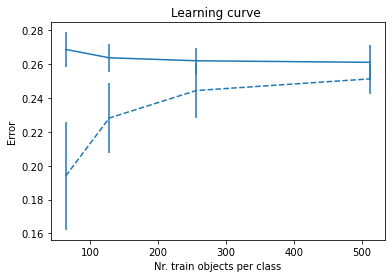

In [165]:
c = pr.cleval(a1, pr.nmc(), trainsize=[64, 128, 256, 512], nrreps=100)

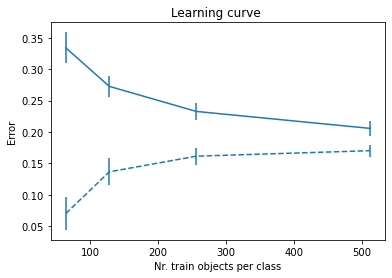

In [167]:
c = pr.cleval(a1, pr.ldc(), trainsize=[64, 128, 256, 512], nrreps=100)

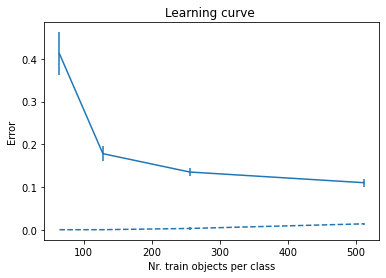

In [168]:
c = pr.cleval(a1, pr.qdc(), trainsize=[64, 128, 256, 512], nrreps=100)

a. The solid line represents the testing error and dashed - training. The training error increases as the learner is fed more samples to tune its parameters. Initially, the model simply over-fits to the small no of data points and thus produces small training error. With more samples, the model must improve its generalisability by tuning its parameters and thus the error stops increasing at the same rate and plateaus. <br>
The testing error curve drops as the no of samples being fed to training data increase as the model becomes more robust to handle unseen data due to its parameter tuning by learning.

b. Curves intersect when the model has learned enough from the training dataset to replicate its performance on the unseen test dataset.

c. The curves converge to the same value

The best out of the 3 is LDC as QDC overfits

# Ex.3.15 

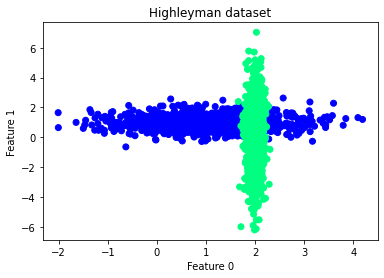

In [176]:
a = pr.gendath([1000,1000])
a1 = pr.prdataset(a, a.targets)
pr.scatterd(a1)

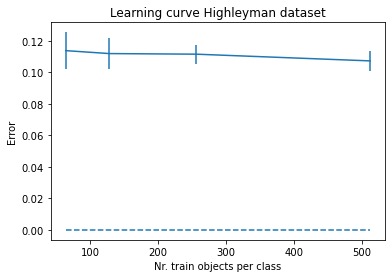

In [177]:
c = pr.cleval(a1, pr.knnc(w=1), trainsize=[64, 128, 256, 512], nrreps=10)

# Ex. 3.17

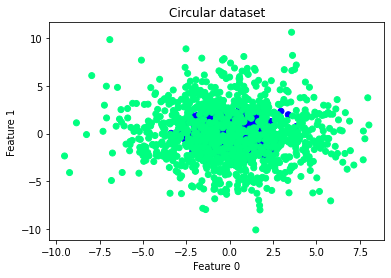

In [188]:
a = pr.gendatc([1000,1000])
a1 = pr.prdataset(a, a.targets)
pr.scatterd(a1)

/home/anuj/anaconda3/envs/torch/lib/python3.8/site-packages/prtools/prtools.py:592: RuntimeWarning: divide by zero encountered in double_scalars
  scale = 1./(2*v)
/home/anuj/anaconda3/envs/torch/lib/python3.8/site-packages/prtools/prtools.py:597: RuntimeWarning: invalid value encountered in multiply
  out = numpy.exp(-scale*sqeucldist(+x,mn))
/home/anuj/anaconda3/envs/torch/lib/python3.8/site-packages/prtools/prtools.py:599: RuntimeWarning: invalid value encountered in true_divide
  return outp/numpy.sum(outp,axis=1,keepdims=True)


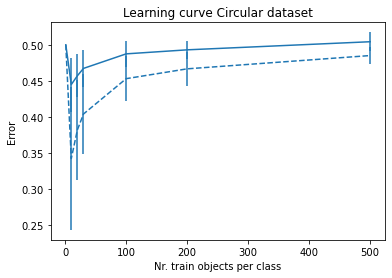

In [190]:
c = pr.cleval(a1, pr.nmc(), trainsize=[1, 10, 20, 30, 100, 200, 500], nrreps=100)

#  Ex.3.19

In [172]:
help(pr.clevalf)

Help on function clevalf in module prtools.prtools:

clevalf(a, u, trainsize=0.6, nrreps=5, testfunc=<function testc at 0x00000269FA39B950>)
    Feature curve
    
           E = clevalf(A,U,TRAINSIZE,NRREPS)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A for varying feature set sizes. The nr of features is from
    1 to the nr of features in A. For K features, the classifier is
    trained on A[:,:K]
    To get reliable estimates, the train-test split is repeated NRREPS=5
    times.
    
    Example:
    a = gendatb([100,100])
    u = nmc()
    e = clevalf(a,u,nrreps=10)



In [191]:
a = np.loadtxt("mfeat-kar")
label = np.array([[i] * 200 for i in range(10)]).reshape(-1, 1)

In [192]:
a.shape

(2000, 64)

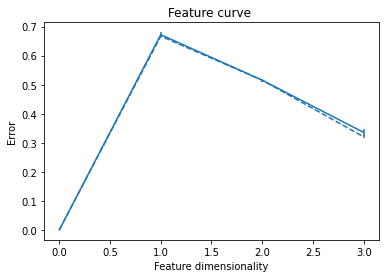

In [186]:
c = pr.clevalf(pr.prdataset(a[:, :4], label), pr.qdc(), trainsize=0.5)

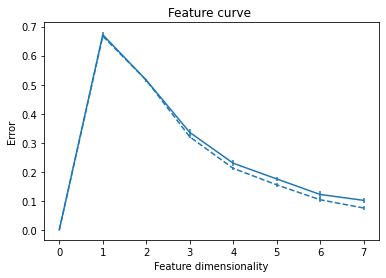

In [187]:
c = pr.clevalf(pr.prdataset(a[:, :8], label), pr.qdc(), trainsize=0.5)

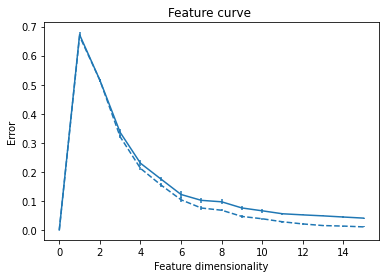

In [188]:
c = pr.clevalf(pr.prdataset(a[:, :16], label), pr.qdc(), trainsize=0.5)

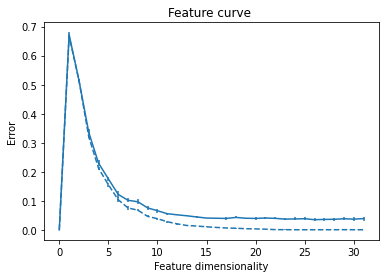

In [189]:
c = pr.clevalf(pr.prdataset(a[:, :32], label), pr.qdc(), trainsize=0.5)

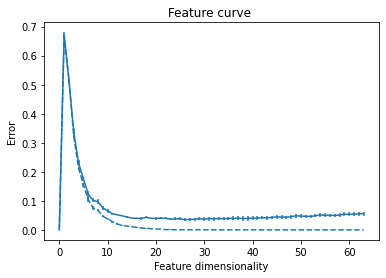

In [190]:
c = pr.clevalf(pr.prdataset(a[:, :64], label), pr.qdc(), trainsize=0.5)

a. The error increases to a particular initial small no of dimensions as the limited dims aren't enough for capturing any variance/patterns in the train/test data. Then after a certain min dims, the error starts decreasing. <br>
After ~40 dimensions, the test error starts increasing again due to the curse of dimensionality. This is because with every single increase in dimension, the theoretical amount of data to be added is exponential. But in this case, the size of the data remains the same and thus the test error starts increasing slowly due to the incapability of the classifier to generalize well enough with the increasing dims

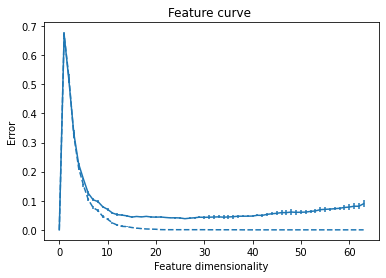

In [193]:
c = pr.clevalf(pr.prdataset(a[:, :64], label), pr.qdc(), trainsize=0.4)

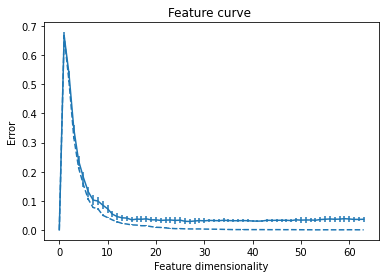

In [194]:
c = pr.clevalf(pr.prdataset(a[:, :64], label), pr.qdc(), trainsize=0.8)

b. The error bumps up even more and quicker when 40% of the data is used and stays at a plateau when 80% is used. This is because of the demand for more data as the feature size increases 

# Ex.3.20 

In [198]:
help(pr.prcrossval)

Help on function prcrossval in module prtools.prtools:

prcrossval(a, u, k=10, nrrep=1, testfunc=<function testc at 0x00000269FA39B950>)
    Performance estimation using crossvalidation
    
           E = prcrossval(A,U,K,NRREP)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A by using K-fold (stratified) crossvalidation. If required,
    the crossvalidation can be repeated NRREP times, to get a better
    estimate.
    
    Example:
    a = gendatb()
    u = nmc()
    e = prcrossval(a,u,k=10)



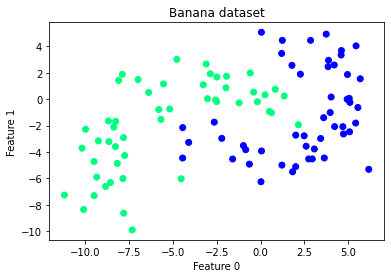

In [227]:
a = pr.gendatb([50, 50])
pr.scatterd(a)

In [228]:
for k in range(5,20):
    e = pr.prcrossval(a, pr.knnc(), k=k, nrrep=10)
    print(np.std(e))

0.033481338085566414
0.04007772797746138
0.038166539202581715
0.037161882718867785
0.04746524249955791
0.04208325082500163
0.0470536883440274
0.04735678336369095
0.050940368123291856
0.05573984456480698
0.05352108157389484
0.05511735821937888
0.05980392156862744
0.06462273124597866
0.060566030702862074


The variance of error increases as k increases (k-fold CV).

# Ex. 3.21 

In [201]:
a = pr.gendats([10,10],2,8)
w = pr.parzenm(+a)
h = pr.parzenml(a)

AttributeError: module 'prtools' has no attribute 'parzenml'

# Ex. 3.22 

In [205]:
help(pr.confmat)

AttributeError: module 'prtools' has no attribute 'confmat'